In [1]:
%matplotlib inline
import chainer
import matplotlib.pyplot as plt
import net
import numpy as np
import os
import chainer.functions as F

In [2]:
# set paths and paramters
out_dir_path = './result_3'
log_path = os.path.join(out_dir_path, 'log')
model_name = 'model_100.npz'
dimz = 100

In [3]:
# load a model
model = net.VAE(784, dimz, 500) 
chainer.serializers.load_npz(os.path.join(out_dir_path, model_name), model, strict=True)
model.to_cpu()

In [4]:
# load dataset
train, test = chainer.datasets.get_mnist(withlabel=False) 

In [5]:
def save_images(x, filename):
    fig, ax = plt.subplots(3, 3, figsize=(9, 9), dpi=100)
    for ai, xi in zip(ax.flatten(), x): 
        ai.imshow(xi.reshape(28, 28))
    fig.savefig(filename)

In [6]:
# encode and decode training dataset
train_ind = [1, 3, 5, 10, 2, 0, 13, 15, 17]  
x = chainer.Variable(np.asarray(train[train_ind])) 
with chainer.using_config('train', False), chainer.no_backprop_mode(): 
    x1 = model(x) 

train


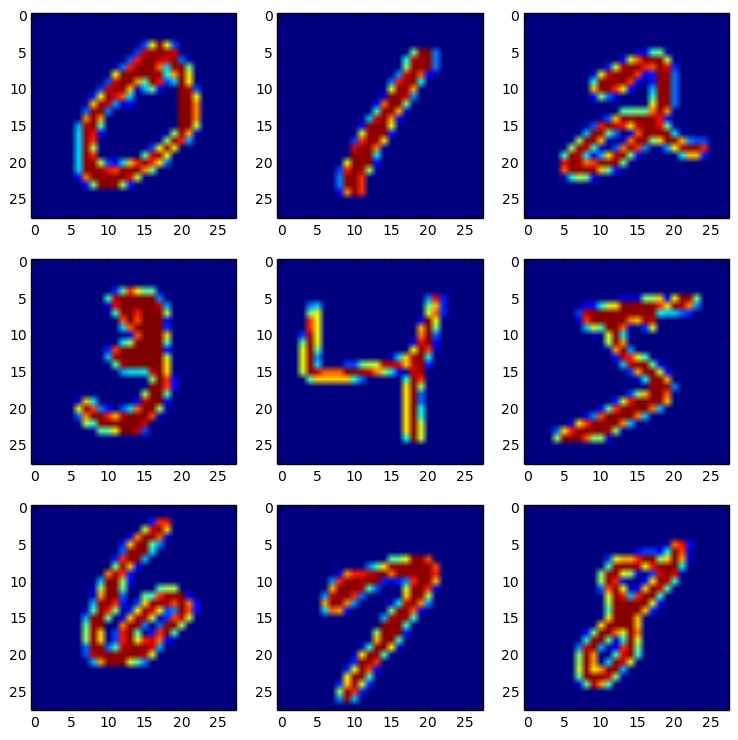

In [7]:
print('train')
save_images(x.data, os.path.join(out_dir_path, 'train')) 

train_reconstructed


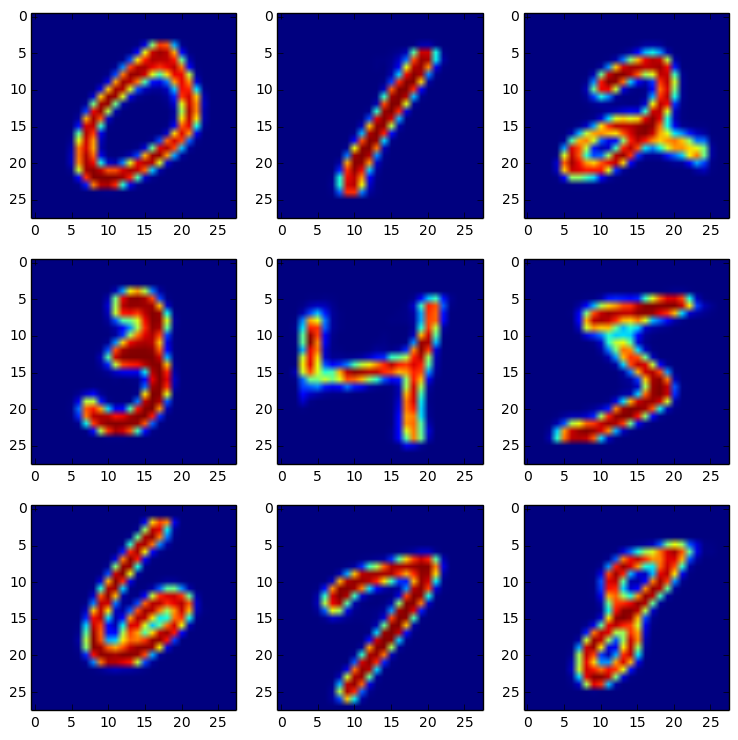

In [8]:
print('train_reconstructed')
save_images(x1.data, os.path.join(out_dir_path, 'train_reconstructed'))  

In [9]:
# # encode and decode training dataset
test_ind = [3, 2, 1, 18, 4, 8, 11, 17, 61]
x = chainer.Variable(np.asarray(test[test_ind]))
with chainer.using_config('train', False), chainer.no_backprop_mode():
    x1 = model(x)

test


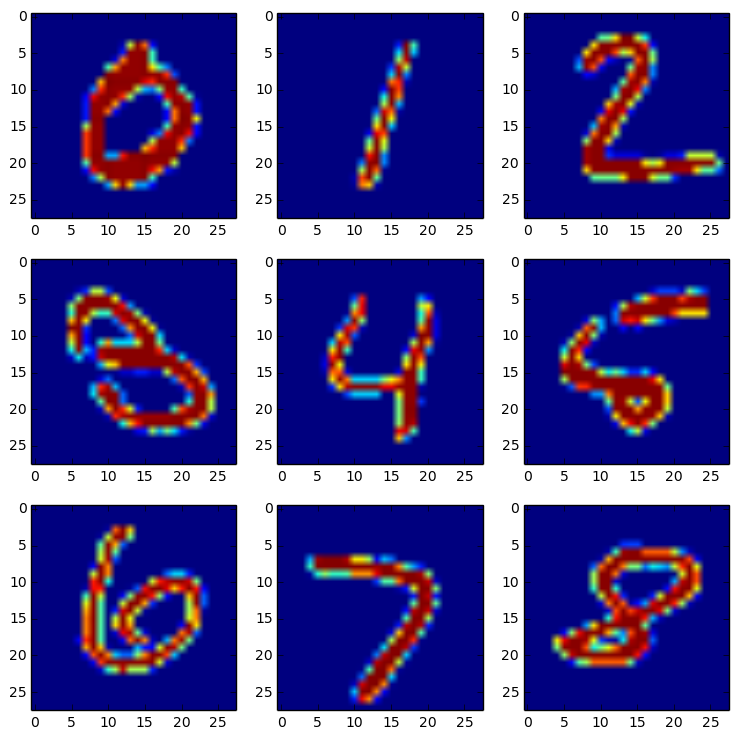

In [10]:
print('test')    
save_images(x.data, os.path.join(out_dir_path, 'test'))

test reconstructed


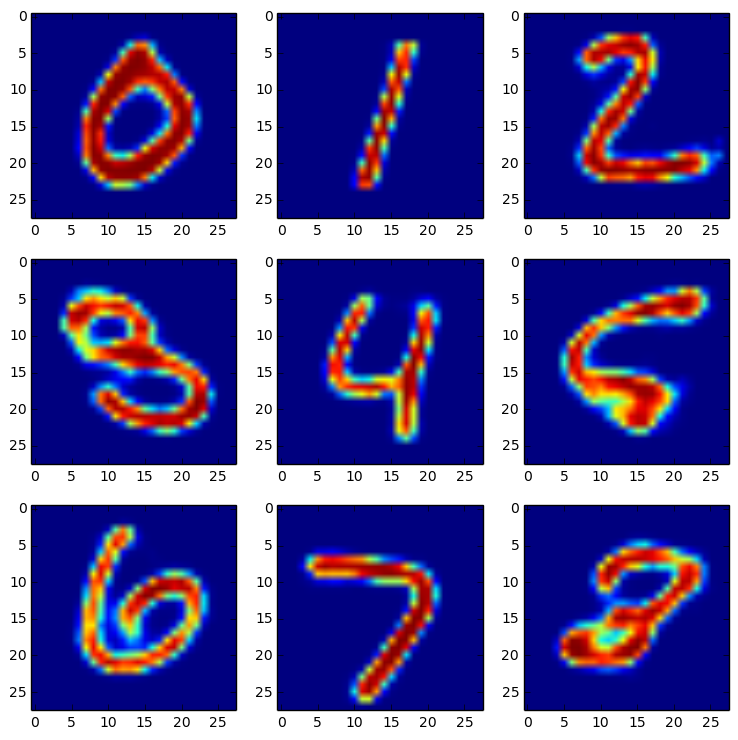

In [11]:
print('test reconstructed')
save_images(x1.data, os.path.join(out_dir_path, 'test_reconstructed'))

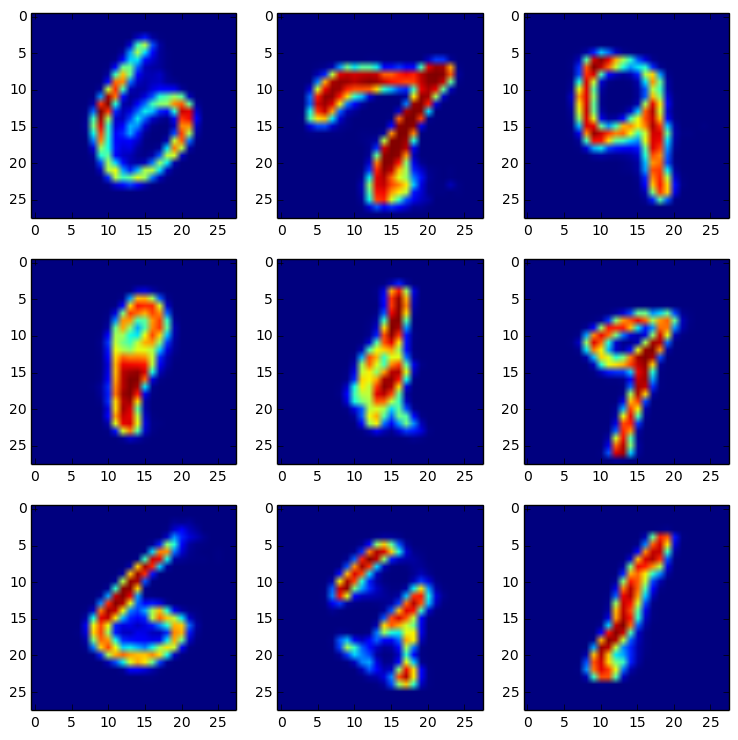

In [26]:
# draw images from randomly sampled z
z = chainer.Variable(
    np.random.normal(0, 1, (9, dimz)).astype(np.float32))
x = model.decode(z)
save_images(x.data, os.path.join(out_dir_path, 'sampled'))

In [13]:
def load_loss(path):
    return [float(line) for line in open(path)]

import re
def loss_generator(path, s):
    s = re.compile(r'"{}": ([0-9]+.[0-9]+),'.format(s))
    for line in open(path):
        m = s.findall(line)
        if m:
            yield float(m[0])

In [19]:
main_rec_loss = list(loss_generator(log_path, 'main/rec_loss'))
validation_main_rec_loss = list(loss_generator(log_path, 'validation/main/rec_loss'))
main_kl = list(loss_generator(log_path, 'main/kl'))
validation_main_kl = list(loss_generator(log_path, 'validation/main/kl'))

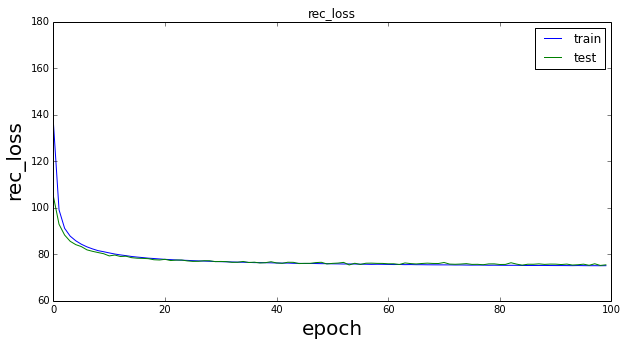

In [21]:
plt.figure(figsize=(10, 5))
plt.title('rec_loss')
plt.xlabel('epoch', fontsize=20)
plt.ylabel('rec_loss', fontsize=20)
plt.xlim(0, 100)
plt.ylim(60, 180)
plt.plot(main_rec_loss, label='train')
plt.plot(validation_main_rec_loss, label='test')
plt.legend(loc='best')
plt.show()

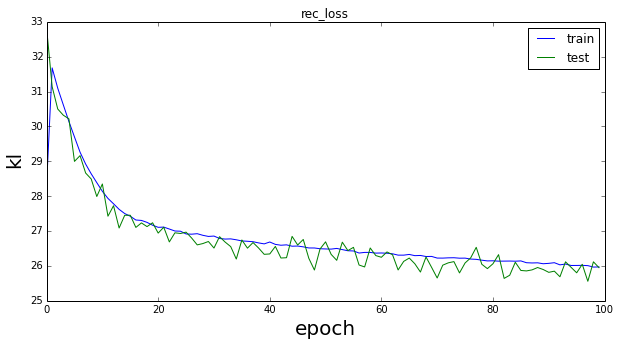

In [22]:
plt.figure(figsize=(10, 5))
plt.title('rec_loss')
plt.xlabel('epoch', fontsize=20)
plt.ylabel('kl', fontsize=20)
plt.xlim(0, 100)
# plt.ylim(8, 22)
plt.plot(main_kl, label='train')
plt.plot(validation_main_kl, label='test')
plt.legend(loc='best')
plt.show()

In [23]:
def decode(dataset):
    ind = [1, 3, 5, 10, 2, 0, 13, 15, 17]  
    x = chainer.Variable(np.asarray(dataset[ind])) 
    with chainer.using_config('train', False), chainer.no_backprop_mode(): 
        mu, ln_var = model.encode(x) 
        average_mu = np.average(mu.data)
        sigma = np.exp(ln_var.data/2)
        average_sigma = np.average(sigma)
        return average_mu, average_sigma

In [24]:
mu, sigma = decode(train)
print('mu(0): {}'.format(mu))
print('sigma(1): {}'.format(sigma))

mu(0): 0.006480237003415823
sigma(1): 0.856469988822937


In [25]:
mu, sigma = decode(test)
print('mu(0): {}'.format(mu))
print('sigma(1): {}'.format(sigma))

mu(0): -0.014518625102937222
sigma(1): 0.8673626184463501
